In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
outdir = './src/out/'

In [5]:
df_vgg16_cifar = pd.read_csv(outdir + 'VGG16_SGD_CIFAR10.csv')
# df_vgg_cifar = pd.read_csv(outdir + 'VGG16_SGD_CIFAR10.csv')
df_resnet56_cifar = pd.read_csv(outdir + 'resnet56_cifar10_SGD_CIFAR10.csv')
df_resnet56_svhn = pd.read_csv(outdir + 'resnet56_cifar10_SGD_SVHN.csv')

In [40]:
modelstats = [(df_vgg16_cifar, 'VGG16 - CIFAR10'),
(df_resnet56_cifar, 'ResNet50 - CIFAR10'),
(df_resnet56_svhn, 'ResNet50 - SVHN')]

In [32]:
df_vgg16_cifar[df_vgg16_cifar['valid_loss'] == df_vgg16_cifar['valid_loss'].min()]['epoch'].values[0]

273.0

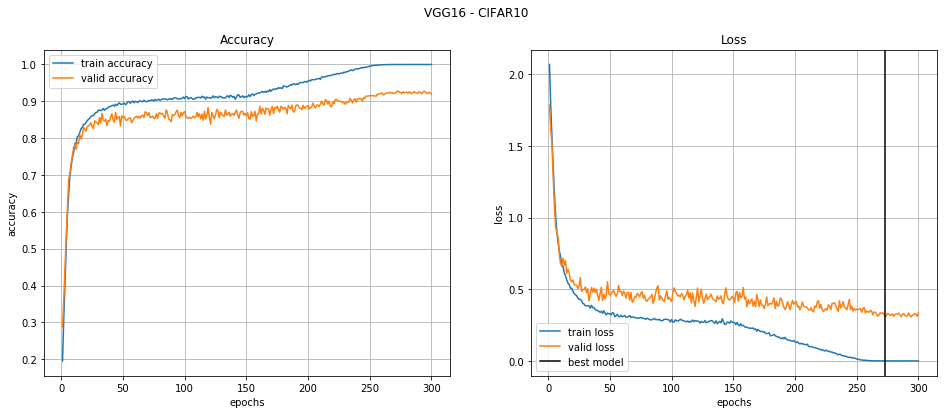

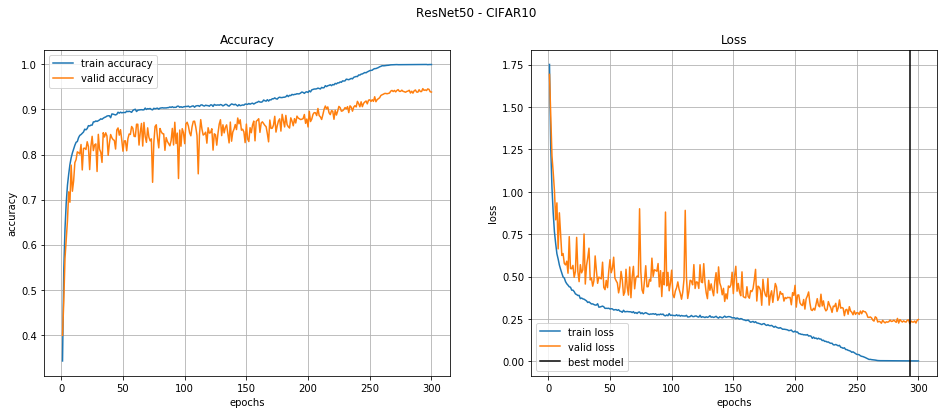

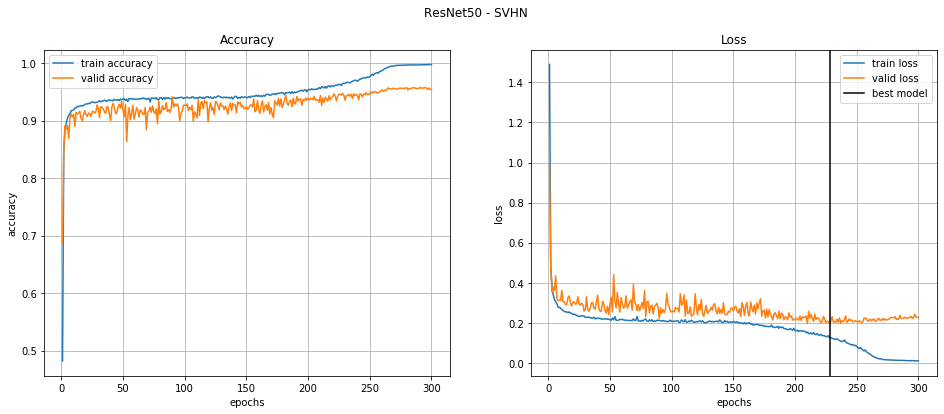

In [41]:
for stat, title in modelstats:
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(stat['epoch'], stat['train_acc'], label='train accuracy')
    ax[0].plot(stat['epoch'], stat['valid_acc'], label='valid accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].set_title('Accuracy')
    ax[0].legend()
    ax[0].grid()
    ax[1].plot(stat['epoch'], stat['train_loss'], label='train loss')
    ax[1].plot(stat['epoch'], stat['valid_loss'], label='valid loss')
    ax[1].axvline(x=stat[stat['valid_loss'] == stat['valid_loss'].min()]['epoch'].values[0], color='black', label='best model')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].set_title('Loss')
    ax[1].legend()
    ax[1].grid()
    plt.suptitle(title)

In [43]:
vgg_cifar = np.load(outdir + 'VGG16_SGD_CIFAR10_CALIBRATION.npz')
resnet56_cifar = np.load(outdir + 'resnet56_cifar10_SGD_CIFAR10_CALIBRATION.npz')
resnet56_svhn = np.load(outdir + 'resnet56_cifar10_SGD_SVHN_CALIBRATION.npz')

In [45]:
vgg_cifar.files

['confidence', 'accuracy', 'prop_in_bin', 'ece']

Text(0.5, 0.98, 'Calibration Curves')

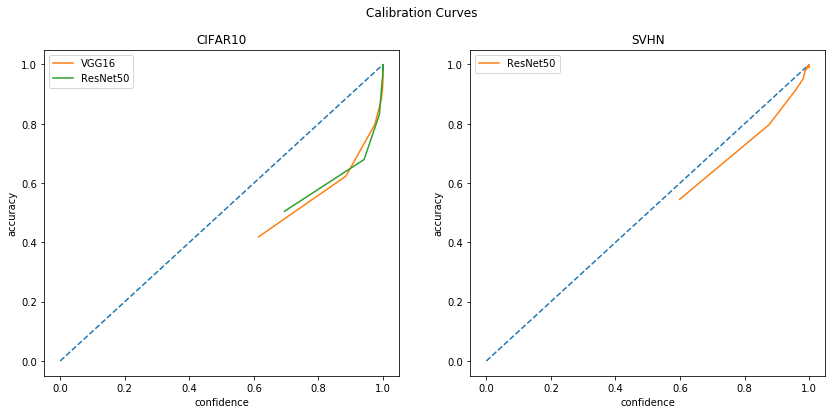

In [58]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot([0, 1], [0, 1], '--')
ax[0].plot(vgg_cifar['confidence'], vgg_cifar['accuracy'], label='VGG16')
ax[0].plot(resnet56_cifar['confidence'], resnet56_cifar['accuracy'], label='ResNet50')
ax[0].set_xlabel('confidence')
ax[0].set_ylabel('accuracy')
ax[0].set_title('CIFAR10')
ax[0].legend()
ax[1].plot([0, 1], [0, 1], '--')
ax[1].plot(resnet56_svhn['confidence'], resnet56_svhn['accuracy'], label='ResNet50')
ax[1].set_xlabel('confidence')
ax[1].set_ylabel('accuracy')
ax[1].set_title('SVHN')
ax[1].legend()
plt.suptitle("Calibration Curves")